* Col1 - Year
* Col2 - Total Weighted Observations
* Col3 - GMSL (Global Isostatic Adjustment (GIA) not applied) variation (mm) with respect to 20-year TOPEX/Jason collinear mean reference
* Col4 - Standard Deviation of GMSL (GIA not applied) variation estimate (mm)
* Col5 - Smoothed (60-day Gaussian type filter) GMSL (GIA not applied) variation (mm)
* Col6 - GMSL (Global Isostatic Adjustment (GIA) applied) variation (mm) with respect to 20-year TOPEX/Jason collinear mean reference
* Col7 - Standard deviation of GMSL (GIA applied) variation estimate (mm)
* Col8 - Smoothed (60-day Gaussian type filter) GMSL (GIA applied) variation (mm)
* Col9 - Smoothed (60-day Gaussian type filter) GMSL (GIA applied) variation (mm); annual and semi-annual signal removed

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = 'data/sealevel.csv'

df = pd.read_csv(path)
df.set_index('Year', inplace=True)
df

# we only care about GMSL_noGIA
# group by year, and take the mean
df_simple = df.groupby('Year').mean()[['GMSL_noGIA']].copy()
df_simple['uncertainty'] = df.groupby('Year').std()['GMSL_noGIA'].copy()
df_simple.head(3)

,GMSL_noGIA,uncertainty
Year,,
1993,-34.605405,4.156152
1994,-30.951081,4.658920
1995,-28.645946,4.895150


In [24]:
df_simple.tail(3)

,GMSL_noGIA,uncertainty
Year,,
2019,49.299189,4.956903
2020,49.717778,4.428329
2021,50.031111,2.034603


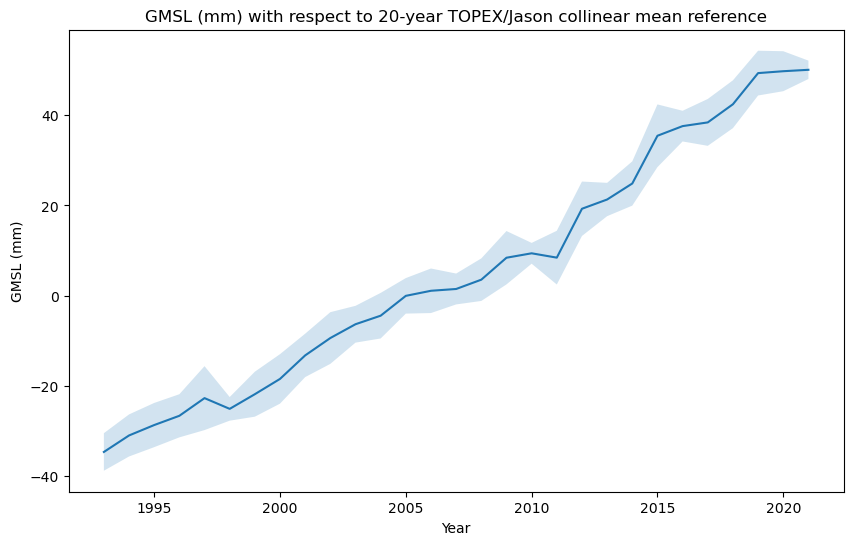

In [25]:
# plotting annual values
plt.figure(figsize=(10, 6))
plt.plot(df_simple['GMSL_noGIA'])
plt.fill_between(df_simple.index, df_simple['GMSL_noGIA'] - df_simple['uncertainty'], df_simple['GMSL_noGIA'] + df_simple['uncertainty'], alpha=0.2)
plt.xlabel('Year')
plt.ylabel('GMSL (mm)')
plt.title('GMSL (mm) with respect to 20-year TOPEX/Jason collinear mean reference')
plt.savefig('images/sea_level_data_first_look.png')


In [26]:
# save processsed sea level data
df_simple.to_csv('data/processed_sea_level_data.csv')

